## Conditional sampling

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import kdetools as kt

Generate toy 2D mixture of 3 Gaussians, all centred on 0 in the x-direction

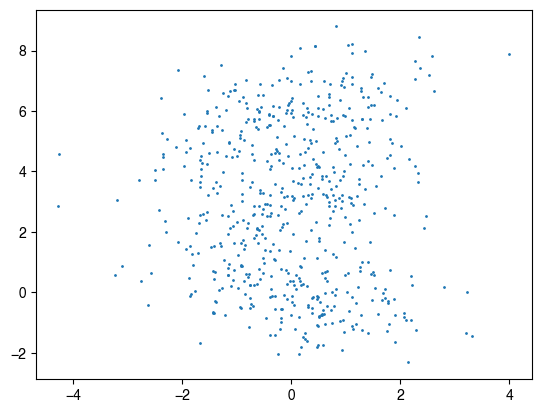

In [2]:
np.random.seed(0)
N = 200
X = np.vstack([np.random.multivariate_normal([0,0],[[1.5,-0.5],[-0.5,1]], size=N),
               np.random.multivariate_normal([0,3],[[1,0.5],[0.5,1.5]], size=N),
               np.random.multivariate_normal([0,6],[[2,1],[1,1.5]], size=N)])
plt.scatter(X[:,0], X[:,1], s=1);

Define mixture pdf:

In [3]:
def zz_pdf_func(X):
    zz_pdf1 = st.multivariate_normal([0,0],[[1.5,-0.5],[-0.5,1]])
    zz_pdf2 = st.multivariate_normal([0,3],[[1,0.5],[0.5,1.5]])
    zz_pdf3 = st.multivariate_normal([0,6],[[2,1],[1,1.5]])
    return (zz_pdf1.pdf(X)+zz_pdf2.pdf(X)+zz_pdf3.pdf(X))/3

Fit KDEs using different bandwith types, noting that the input array must be transposed as scipy's `gaussian_kde` expects inputs with shape `n_dims` x `n_records`:

In [4]:
kde1 = kt.gaussian_kde(X.T)
kde2 = kt.gaussian_kde(X.T); kde2.set_bandwidth('cv', bw_type='equal')
kde3 = kt.gaussian_kde(X.T); kde3.set_bandwidth('cv', bw_type='diagonal')
kde4 = kt.gaussian_kde(X.T); kde4.set_bandwidth('cv', bw_type='covariance')

Plot 2D KDEs and overlay contours of true distribution:

In [5]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-3, 10, 1000)) 
zz_pdf = zz_pdf_func(np.stack([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

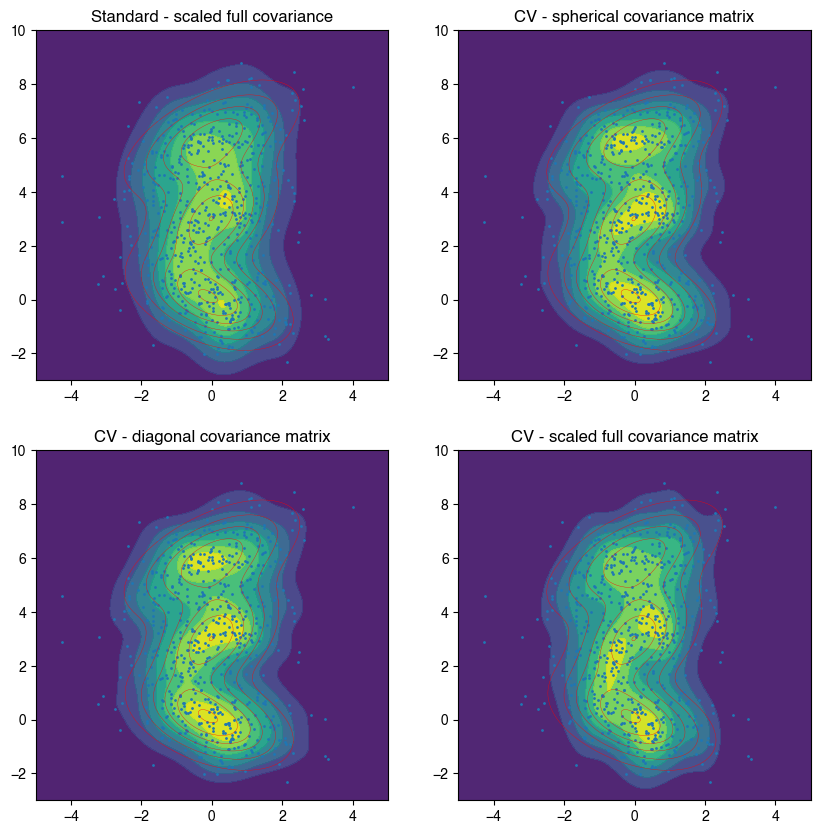

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
zz_kde1 = kde1.pdf(np.stack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
zz_kde2 = kde2.pdf(np.stack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
zz_kde3 = kde3.pdf(np.stack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
zz_kde4 = kde4.pdf(np.stack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

ax1.contourf(xx, yy, zz_kde1, alpha=0.95)
ax1.contour(xx, yy, zz_pdf, colors='r', linewidths=0.25)
ax1.scatter(X[:,0], X[:,1], s=1)
ax1.set_title('Standard - scaled full covariance')

ax2.contourf(xx, yy, zz_kde2, alpha=0.95)
ax2.contour(xx, yy, zz_pdf, colors='r', linewidths=0.25)
ax2.scatter(X[:,0], X[:,1], s=1)
ax2.set_title('CV - spherical covariance matrix')

ax3.contourf(xx, yy, zz_kde3, alpha=0.95)
ax3.contour(xx, yy, zz_pdf, colors='r', linewidths=0.25)
ax3.scatter(X[:,0], X[:,1], s=1)
ax3.set_title('CV - diagonal covariance matrix')

ax4.contourf(xx, yy, zz_kde4, alpha=0.95)
ax4.contour(xx, yy, zz_pdf, colors='r', linewidths=0.25)
ax4.scatter(X[:,0], X[:,1], s=1)
ax4.set_title('CV - scaled full covariance matrix');

Take conditional samples from the diagonal KDE (as it shows the best qualitative separation of the components) at x=0, expecting to see 3 peaks:

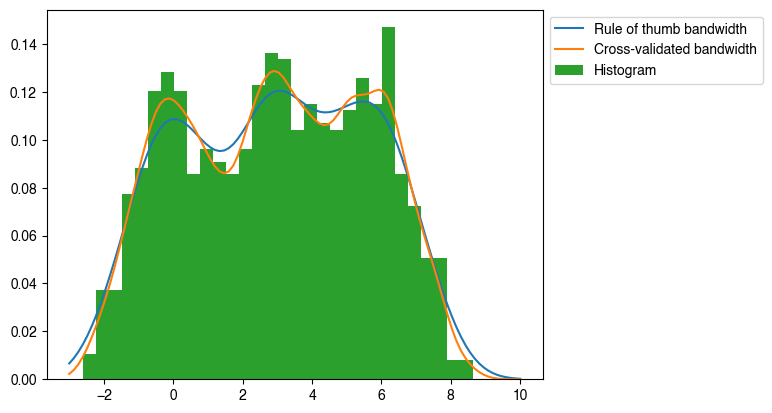

In [7]:
np.random.seed(42)
y = kde3.conditional_resample(1000, x_cond=np.array([0]), dims_cond=[0]).ravel()
kde1d = kt.gaussian_kde(y)
xs = np.linspace(-3, 10, 100)
plt.plot(xs, kde1d.pdf(xs), label='Rule of thumb bandwidth')

# Update the bandwidth
kde1d.set_bandwidth(bw_method='cv', bw_type='equal')
xs = np.linspace(-3, 10, 100)
plt.plot(xs, kde1d.pdf(xs), label='Cross-validated bandwidth')

plt.hist(y, bins=30, density=True, label='Histogram')

plt.legend(bbox_to_anchor=(1,1));